<a href="https://colab.research.google.com/github/marcellohmartins/practice/blob/main/btc_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Data Science - pós/Practice/market-price.csv')
df_norm = df.drop(['Timestamp'], 1, inplace = True)
#df.head()

In [8]:
prediction_days = 30

df_train = df[:len(df)-prediction_days]
df_test = df[len(df)-prediction_days:]


In [9]:
training_set = df_train.values
training_set = min_max_scaler.fit_transform(training_set)

X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train),1,1))

In [ ]:
num_units = 4
activation_function = 'sigmoid'
optimizer = 'adam'
loss_function = 'mean_squared_error'
batch_size = 5
num_epochs = 100

# Initialize the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = num_units, activation = activation_function, input_shape=(None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = optimizer, loss = loss_function)

# Using the training set to train the model
regressor.fit(X_train, y_train, batch_size = batch_size, epochs = num_epochs)

In [12]:
test_set = df_test.values

inputs = np.reshape(test_set, (len(test_set), 1))
inputs = min_max_scaler.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))

predicted_price = regressor.predict(inputs)
predicted_price = min_max_scaler.inverse_transform(predicted_price)

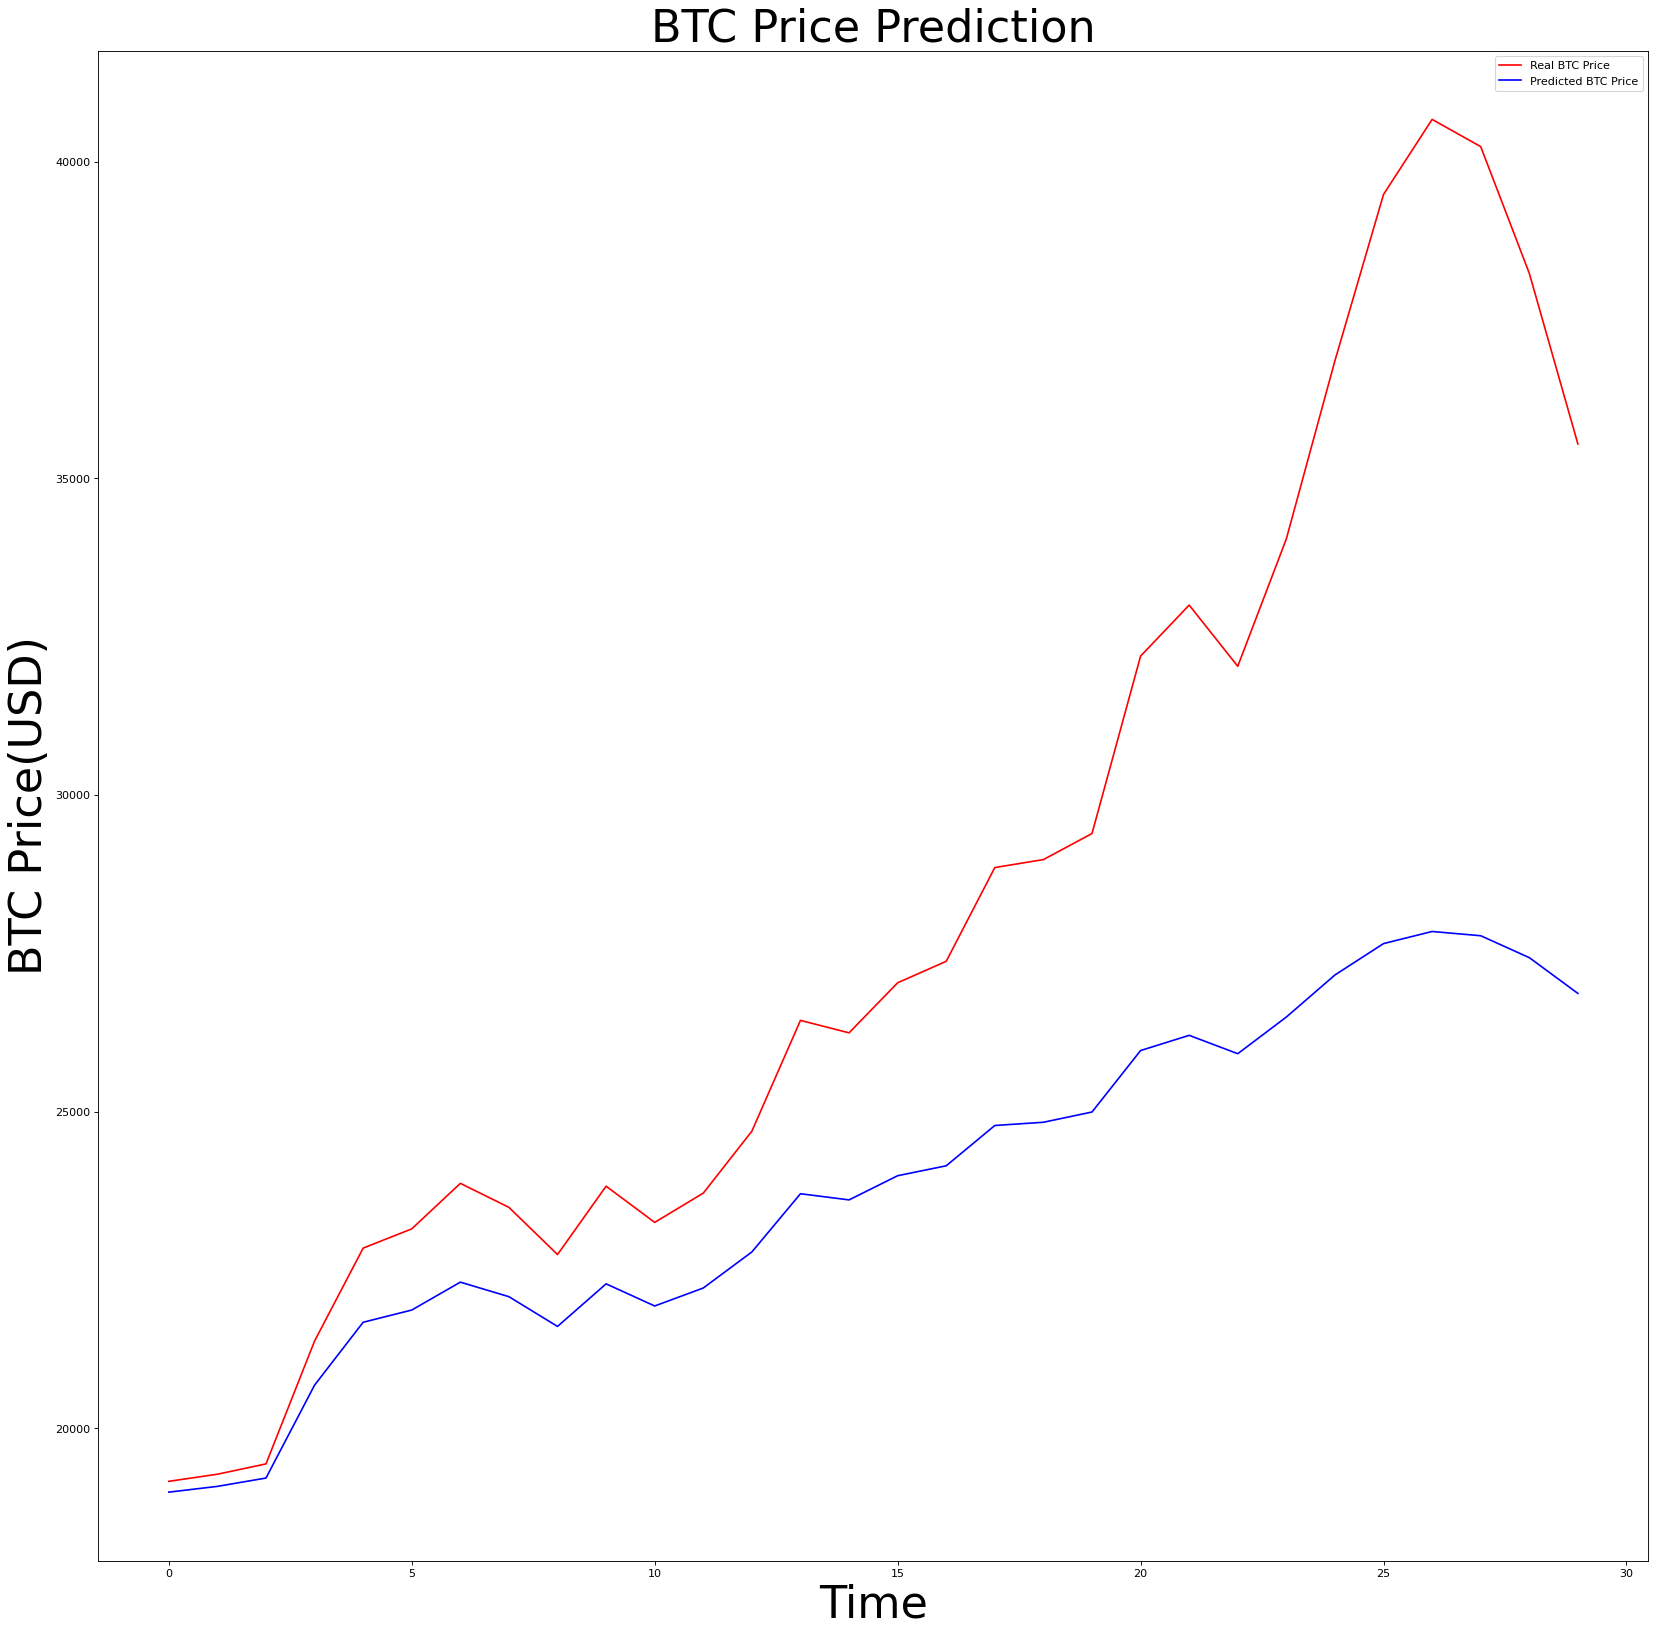

In [13]:

plt.figure(figsize=(25, 25), dpi=80, facecolor = 'w', edgecolor = 'k')

plt.plot(test_set[:, 0], color='red', label='Real BTC Price')
plt.plot(predicted_price[:, 0], color = 'blue', label = 'Predicted BTC Price')

plt.title('BTC Price Prediction', fontsize = 40)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize = 40)
plt.legend(loc = 'best')
plt.show()